In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [79]:
!pip install 'astrodendro'
!pip install 'aplpy'
!pip install 'wcsaxes'
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.wcs.wcsapi import SlicedLowLevelWCS
import astrodendro 
from astrodendro import Dendrogram
from astrodendro import DendrogramPlotter
import aplpy 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
data_path = '/content/gdrive/MyDrive/Topics Data/cleanimage.G10.99_Feather_SiO.image.fits'
data_path_2 = '/content/gdrive/MyDrive/Topics Data/cleanimage.G10.99.SiO.12m.7m.combined.image.mom0.fits'
dendro_path = '/content/gdrive/MyDrive/Topics Data/new_dendro.fits'
special_dendro_path = '/content/gdrive/MyDrive/Topics Data/new_special_dendro.fits'



def createMultiImage(plotData, noiseThresh):
  dataSlice1 = plotData[0,:,:]
  dataSlice2 = plotData[100,:,:]
  data = plotData.sum(axis = 0)
  print(f'Shape of plotted data: {data.shape}')

  plt.style.use(astropy_mpl_style)
  fig, axs = plt.subplots(2, 2)
  axs[0,0].imshow(data, cmap = mpl.cm.PuOr, vmin = noiseThresh)
  axs[0,1].hist(data, range = (noiseThresh, data.max()))
  axs[1,0].hist(dataSlice1)
  axs[1,1].hist(dataSlice2)
  plt.show()

def createImage(plotData, noiseThresh):
  dataSlice = plotData[0,0,:,:]


  plt.style.use(astropy_mpl_style)
  plt.imshow(dataSlice, cmap = mpl.cm.PuOr, vmin = noiseThresh)

  plt.show()
  

def printSummary(data):
  print(f'\nSize: {data.size} \nShape: {data.shape} \nMin: {data.min()} \nMax: {data.max()} \nMean: {np.mean(data)} \nMedian: {np.median(data)} \nStandard Dev: {np.std(data)} \nFifth Percentile: {np.percentile(data, 5)} \nNintieth Percentile: {np.percentile(data, 95)}')

def calcNoise(data):
  resizedData = data[0,0,300:400,200:300]
  return np.std(resizedData)

def createAndSaveDendro(data, noiseThresh):
  dendro = Dendrogram.compute(data, min_value = noiseThresh, verbose = True)
  dendro.save_to(dendro_path)

  specialDendro = Dendrogram.compute(data, min_value = 2.0, min_delta = 1, min_npix = 10, verbose = True)
  specialDendro.save_to(special_dendro_path)

def viewDendro():
  dendro = Dendrogram.load_from(dendro_path)
  v = dendro.viewer()
  v.show()

def viewContour(data, hdul):
  wcs = WCS(hdul[0].header)
  wcs = wcs.sub(2)


  dendro = Dendrogram.load_from(dendro_path)
  mask = np.zeros(data.shape, dtype=bool)

  for leaf in dendro.leaves:
    mask = mask | leaf.get_mask()

  mask_hdu = fits.PrimaryHDU(mask.astype('short'), hdul[0].header)
  
  fig = aplpy.FITSFigure(hdul[0], figsize=(8,6))
  fig.show_colorscale(cmap='Blues', vmax = 4.0)
  fig.show_contour(mask_hdu, colors = 'red', linewidths=0.5, projection = wcs)


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not

(1, 1, 512, 512) 
 (1, 1, 512, 512)


INFO:astropy:Setting slices=[0, 0]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices

INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.
INFO:astropy:Auto-setting vmin to -5.137e-01
INFO:astropy:Setting slices=[0, 0]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.


INFO: Auto-setting vmin to -5.137e-01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not

ValueError: ignored

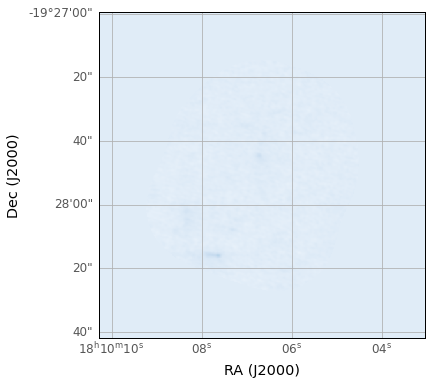

In [90]:
def main():
  
  hdul =   fits.open(data_path)
  hdul2 = fits.open(data_path_2)
  ##hdul.info()
  
  ##hdr = hdul[0].header

  ##print(repr(hdr))

  data = hdul2[0].data
  ##print(repr(hdul2[0].header))
  print(f'{data.shape} \n {hdul2[0].shape}')
  ##printSummary(data)

  noiseThresh = calcNoise(data)
  
  ##createImage(data, noiseThresh)

  ##createAndSaveDendro(slicedData, noiseThresh)

  ##viewDendro()

  viewContour(data, hdul2)

  
if __name__ == "__main__":
  main()